<a href="https://colab.research.google.com/github/Savara-k/Cost-Prediction-Using-Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cost Prediction Using Multiple Linear Regression**

# **Savara Khan**

# **Feature Engineering**

**October 8, 2025**

# About Dataset

**Description:**

Explore the intricacies of medical costs and healthcare expenses with our meticulously curated Medical Cost Dataset. This dataset offers valuable insights into the factors influencing medical charges, enabling researchers, analysts, and healthcare professionals to gain a deeper understanding of the dynamics within the healthcare industry.

**Columns:**

1. ID: A unique identifier assigned to each individual record, facilitating efficient data management and analysis.

2. Age: The age of the patient, providing a crucial demographic factor that often correlates with medical expenses.

3. Sex: The gender of the patient, offering insights into potential cost variations based on biological differences.

4. BMI: The Body Mass Index (BMI) of the patient, indicating the relative weight status and its potential impact on healthcare costs.

5. Children: The number of children or dependents covered under the medical insurance, influencing family-related medical expenses.

6. Smoker: A binary indicator of whether the patient is a smoker or not, as smoking habits can significantly impact healthcare costs.

7. Region: The geographic region of the patient, helping to understand regional disparities in healthcare expenditure.

8. Charges: The medical charges incurred by the patient, serving as the target variable for analysis and predictions.

# 1. Using Python, and its SkLearn Library, implement Linear Regression on Medical Cost Personal Dataset (from kaggle dot com)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nanditapore/medical-cost-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'medical-cost-dataset' dataset.
Path to dataset files: /kaggle/input/medical-cost-dataset


# STEP 1 – Load Data and Preprocessing

In [ ]:
import pandas as pd

# Step 1: Load the Medical Cost dataset
data_path = "/content/medical_cost.csv"
df = pd.read_csv(data_path)

# Step 2: Display the first 15 records to inspect the data
print("First 15 records:")
df.head(15)


First 15 records:


,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
5,6,31,female,25.740,0,no,southeast,3756.62160
6,7,46,female,33.440,1,no,southeast,8240.58960
7,8,37,female,27.740,3,no,northwest,7281.50560
8,9,37,male,29.830,2,no,northeast,6406.41070
9,10,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.dtypes

,0
Id,int64
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df["sex"].value_counts()

,count
sex,
male,676
female,662


In [ ]:
df["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


# Step 2 —  Onehot encoded

In [ ]:
# ============================================
# FEATURE ENGINEERING & ONE-HOT ENCODING
# ============================================

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Step 1: Define the feature columns (X) and target column (y)
# These are the variables we’ll use to predict medical charges
feature_cols = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']
target_col = 'charges'

# Step 2: Create copies of the feature and target data
X = df[feature_cols].copy()
y = df[target_col].copy()

# Step 3: Separate categorical and numerical columns

cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']

# Step 4: Create a OneHotEncoder to convert categorical values into numeric form

enc = OneHotEncoder(
    drop=None,
    sparse_output=False,
    handle_unknown='ignore'
)

# Step 5: Fit and transform the categorical columns
# This turns 'sex', 'smoker', and 'region' into binary columns (0 or 1)
X_cat = enc.fit_transform(X[cat_cols])

# Step 6: Get the new column names created by the encoder
new_cat_names = enc.get_feature_names_out(cat_cols)

# Step 7: Drop the original categorical columns and keep only numerical ones
X_num = X.drop(columns=cat_cols)

# Step 8: Combine the numeric and encoded categorical data into one dataframe
X_pre = pd.concat([
    X_num.reset_index(drop=True),
    pd.DataFrame(X_cat, columns=new_cat_names)
], axis=1)

# Step 9: print
print("Transformed feature matrix (first rows):")
X_pre.head()




Transformed feature matrix (first rows):


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print("New feature names:", list(X_pre.columns))

New feature names: ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


# STEP 3 – Outlier detection and Removal (IQR method)

Outliers are observations that deviate significantly from the overall pattern of a dataset and this deviation can lead to poor results in analysis. Interquartile Range (IQR) is a technique that detects outliers by measuring the variability in a dataset. In this article we will learn about it.

Detecting Outlier with IQR:

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and then we split it into 4 equal parts. The values Q1 (25th percentile), Q2 (50th percentile or median) and Q3 (75th percentile) separate dataset in 4 equal parts.

If a dataset has 2n or 2n+1 data points, then

- Q2 = median of the dataset.

- Q1 = median of n smallest data points.

- Q3 = median of n highest data points.

In [ ]:
# ============================================
# OUTLIER DETECTION
# ============================================

import numpy as np

# Step 1: Combine the encoded features (X_pre) and target (y)
df_clean = pd.concat([X_pre, y], axis=1)

# Step 2: Loop through each numeric column we want to check for outliers

for col in ['age', 'bmi', 'children', 'charges']:
    # Step 3: Calculate the 25th (Q1) and 75th (Q3) percentiles
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)

    # Step 4: Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Step 5: Define the lower and upper limits for acceptable values
    # Anything outside this range is considered an outlier
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Step 6: Count how many rows before filtering
    before = len(df_clean)

    # Step 7: Filter out any rows that fall outside the acceptable range
    df_clean = df_clean[(df_clean[col] >= low) & (df_clean[col] <= high)]

    # Step 8: Calculate how many rows were removed
    removed = before - len(df_clean)
    print(f"{col}: removed {removed} outliers")

# Step 9: Print
print("Remaining rows:", len(df_clean))


age: removed 0 outliers
bmi: removed 9 outliers
children: removed 0 outliers
charges: removed 138 outliers
Remaining rows: 1191


# **2. Evaluate the performance, print the R2 MSE MAE results**

In [ ]:
# ============================================
# LINEAR REGRESSION MODEL & EVALUATION
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Separate the features (X) and the target (y)
# 'charges' is what we want to predict, so we drop it from the feature set
X = df_clean.drop(columns='charges')
y = df_clean['charges']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Scale the numeric features (age, bmi, children)
# Scaling helps keep all numeric values on the same range,
# so large numbers don’t dominate the regression model
scaler = StandardScaler()
cols_to_scale = ['age', 'bmi', 'children']

# Make copies of train/test data before modifying
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Step 4: Create and train the Linear Regression model
# The model learns relationships between X (features) and y (charges)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Step 5: Predict on the test data
y_pred = lr.predict(X_test_scaled)

# Step 6: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 7: Print
print("---------")
print("=== Regular Model Evaluation (in $) ===")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R2): {r2:.3f}")



---------
=== Regular Model Evaluation (in $) ===
Mean Absolute Error (MAE): 2,620.93
Mean Squared Error (MSE): 19,877,696.62
Root Mean Squared Error (RMSE): 4,458.44
R-squared (R2): 0.633


# Trying Normalizing y scales it to 0–1

In [ ]:
# ============================================
# NORMALIZATION ALGORITHM & EVALUATION
# ============================================

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Create a MinMaxScaler to normalize the target
# This scales all y values between 0 and 1 so the metrics are easier to compare
scaler_y = MinMaxScaler()

# Step 2: Fit the scaler on the training target and transform both train and test sets
# reshape(-1, 1) changes y from 1D to 2D since the scaler expects 2D input
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1, 1))

# Step 3: Show how values changed after scaling
print("Before scaling:", y_train.iloc[:5].values)
print("After scaling:", y_train_scaled[:5].ravel())

# Step 4: Train the linear regression model using the normalized target values
lr_norm = LinearRegression()
lr_norm.fit(X_train_scaled, y_train_scaled)

# Step 5: Make predictions on the normalized scale
y_pred_scaled = lr_norm.predict(X_test_scaled)

# Step 6: Calculate the evaluation metrics for the normalized model
# These metrics are now between 0 and 1
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

# Step 7: print
print("---------")
print("=== Normalized Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_scaled:.3f}")
print(f"Mean Squared Error (MSE): {mse_scaled:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.3f}")
print(f"R-squared (R2): {r2_scaled:.3f}")




Before scaling: [4260.744  5934.3798 9583.8933 9880.068  6653.7886]
After scaling: [0.09433466 0.14478845 0.25480746 0.26373601 0.1664759 ]
---------
=== Normalized Model Evaluation ===
Mean Absolute Error (MAE): 0.079
Mean Squared Error (MSE): 0.018
Root Mean Squared Error (RMSE): 0.134
R-squared (R2): 0.633


# **3. Visualize the regression by using matplotlib.pyplot library of Python.**

# Visualization for Regression (Dollar-Based) Regression

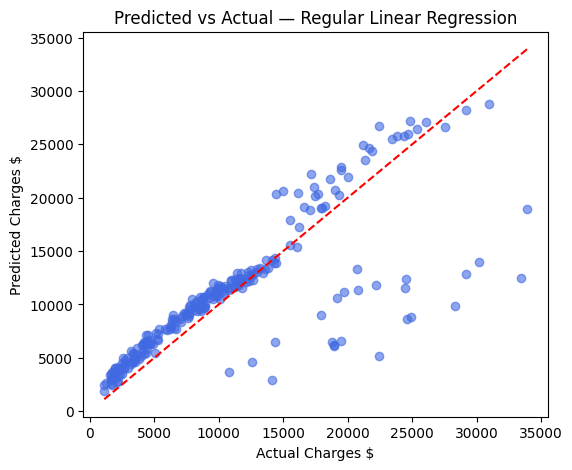

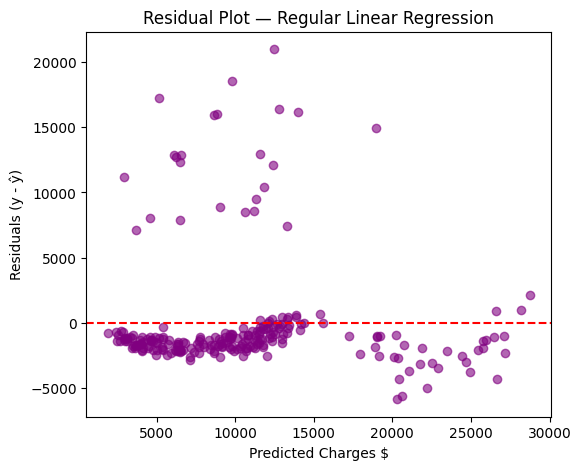

In [ ]:
import matplotlib.pyplot as plt

# --- Regular Model Plots (original $) ---
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Actual Charges $")
plt.ylabel("Predicted Charges $")
plt.title("Predicted vs Actual — Regular Linear Regression")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Charges $")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot — Regular Linear Regression")
plt.show()


# Visualization for Normalized Regression

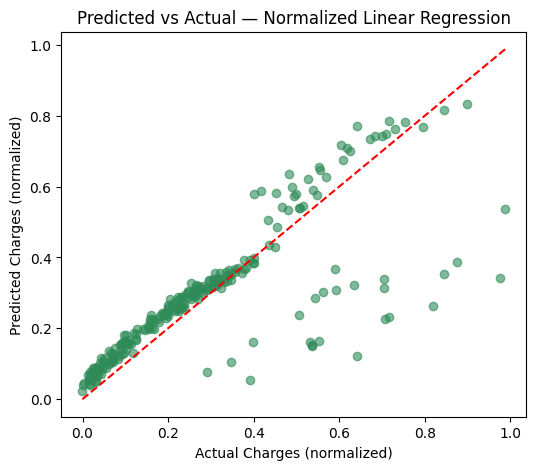

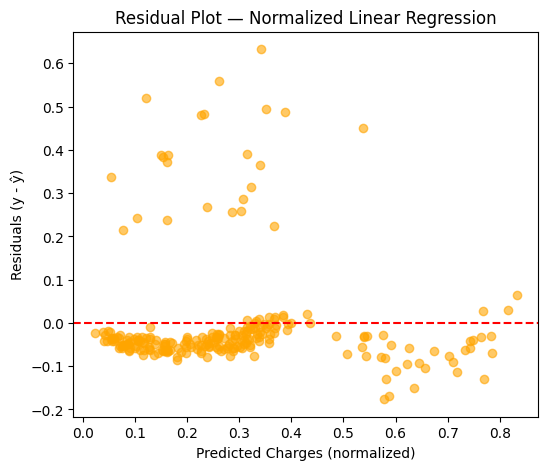

In [ ]:
# --- Normalized Model Plots (charges scaled 0–1) ---
plt.figure(figsize=(6,5))
plt.scatter(y_test_scaled, y_pred_scaled, alpha=0.6, color='seagreen')
lims = [min(y_test_scaled.min(), y_pred_scaled.min()), max(y_test_scaled.max(), y_pred_scaled.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Actual Charges (normalized)")
plt.ylabel("Predicted Charges (normalized)")
plt.title("Predicted vs Actual — Normalized Linear Regression")
plt.show()

# Residual Plot (normalized)
residuals_scaled = y_test_scaled - y_pred_scaled
plt.figure(figsize=(6,5))
plt.scatter(y_pred_scaled, residuals_scaled, alpha=0.6, color='orange')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Charges (normalized)")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot — Normalized Linear Regression")
plt.show()


4. The patterns you discover while feature engineering, feature scaling and outlier removal algorithm must be commented in the code and explained.

When I worked on feature engineering, I turned the categorical columns (sex, smoker, and region) into numbers using one-hot encoding so the model could use them. I noticed that “smoker_yes” had the biggest effect on charges, meaning smokers usually pay more. After removing outliers with the IQR method, the data looked more balanced and less extreme. Then I used feature scaling so all the numeric values were on a similar scale. It didn’t change the R² much, but it made the model more stable and easier to interpret. Overall, these steps helped clean up the data and showed which features really affect medical costs.